## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import helper
from collections import deque
from sklearn.metrics import mean_squared_error
%matplotlib qt

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
print(objp.shape)

(54, 3)


In [3]:
# Make a list of calibration images
images = np.sort(glob.glob('./camera_cal/calibration*.jpg'))
print(images)

['./camera_cal\\calibration01.jpg' './camera_cal\\calibration02.jpg'
 './camera_cal\\calibration03.jpg' './camera_cal\\calibration04.jpg'
 './camera_cal\\calibration05.jpg' './camera_cal\\calibration06.jpg'
 './camera_cal\\calibration07.jpg' './camera_cal\\calibration08.jpg'
 './camera_cal\\calibration09.jpg' './camera_cal\\calibration10.jpg'
 './camera_cal\\calibration11.jpg' './camera_cal\\calibration12.jpg'
 './camera_cal\\calibration13.jpg' './camera_cal\\calibration14.jpg'
 './camera_cal\\calibration15.jpg' './camera_cal\\calibration16.jpg'
 './camera_cal\\calibration17.jpg' './camera_cal\\calibration18.jpg'
 './camera_cal\\calibration19.jpg' './camera_cal\\calibration20.jpg']


In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    plt.ion()
    if ret == True:
        print('>> \'{0}\': Found'.format(fname))
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #helper.plot_image(img, title=fname)
    else:
        print('>> \'{0}\': Not Found'.format(fname))

# plt.close()

>> './camera_cal\calibration01.jpg': Not Found
>> './camera_cal\calibration02.jpg': Found
>> './camera_cal\calibration03.jpg': Found
>> './camera_cal\calibration04.jpg': Not Found
>> './camera_cal\calibration05.jpg': Not Found
>> './camera_cal\calibration06.jpg': Found
>> './camera_cal\calibration07.jpg': Found
>> './camera_cal\calibration08.jpg': Found
>> './camera_cal\calibration09.jpg': Found
>> './camera_cal\calibration10.jpg': Found
>> './camera_cal\calibration11.jpg': Found
>> './camera_cal\calibration12.jpg': Found
>> './camera_cal\calibration13.jpg': Found
>> './camera_cal\calibration14.jpg': Found
>> './camera_cal\calibration15.jpg': Found
>> './camera_cal\calibration16.jpg': Found
>> './camera_cal\calibration17.jpg': Found
>> './camera_cal\calibration18.jpg': Found
>> './camera_cal\calibration19.jpg': Found
>> './camera_cal\calibration20.jpg': Found


In [5]:
print('>> objectpoints length: {0}'.format(len(objpoints)))
print('>> shape of objectpoints element: {0}'.format(objpoints[0].shape))
print('>> {0} row of {1} objectpoints element: {2}'.format('14th', '1st', objpoints[0][13]))
print()
print('>> imgpoints length: {0}'.format(len(imgpoints)))
print('>> shape of imgpoints element: {0}'.format(imgpoints[0].shape))
print('>> {0} row of {1} imgpoints element: {2}'.format('47th', '2nd', imgpoints[1][46]))

>> objectpoints length: 17
>> shape of objectpoints element: (54, 3)
>> 14th row of 1st objectpoints element: [4. 1. 0.]

>> imgpoints length: 17
>> shape of imgpoints element: (54, 1, 2)
>> 47th row of 2nd imgpoints element: [[253.50026 570.71   ]]


In [6]:
def cal_undistort(img, objpoints, imgpoints):
    """
    - takes an image, object points, and image points,
    - performs the camera calibration, image distortion correction, and 
    - returns the undistorted image
    """
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


def plot_original_undistort(image, unditorted_image, save=False, save_path = None):
    # plot 
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=36)
    ax1.axis('off')
    ax2.imshow(unditorted_image)
    ax2.set_title('Undistorted Image', fontsize=36)
    ax2.axis('off')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
    # Save the image
    if (save):
        if(save_path is None): raise Exception('"save_pathe" is None!')
        f.savefig(save_path, dpi=100)

>> Test image: calibration05.jpg


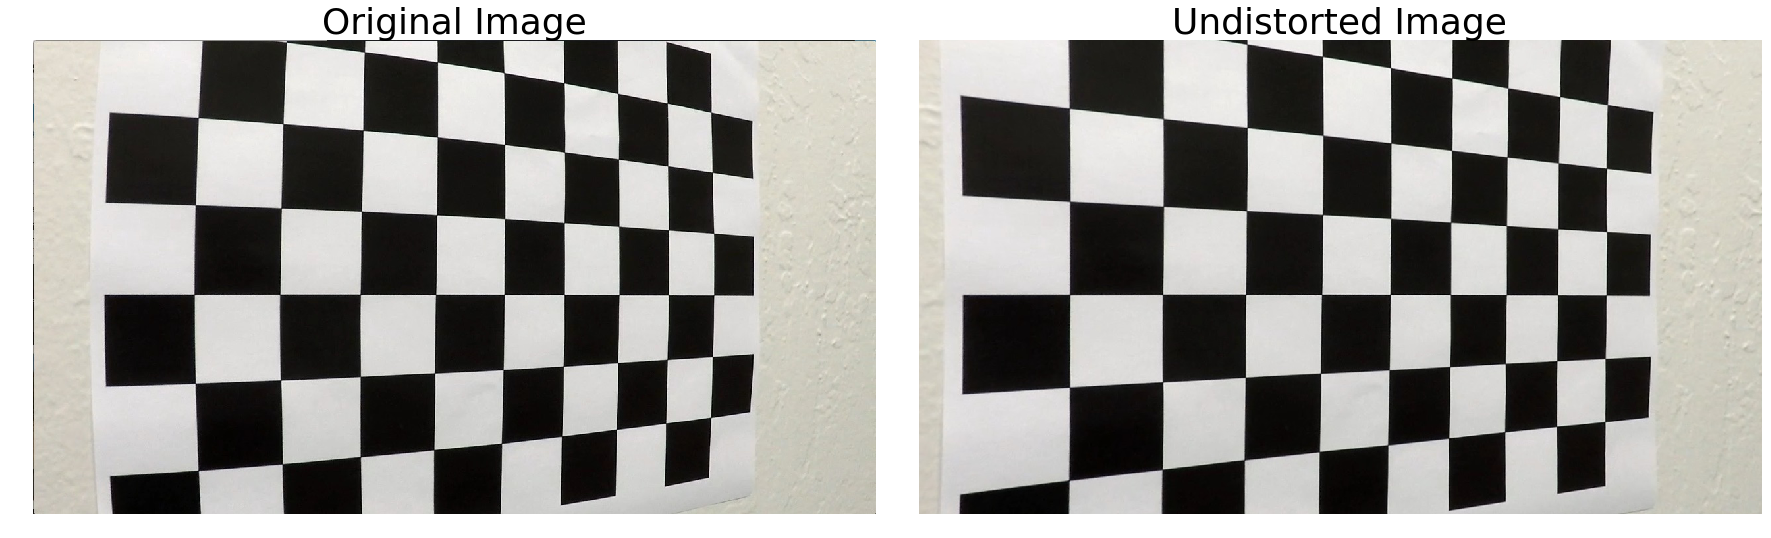

In [7]:
# Undistorting a test image:
idx = 5
image_test_name = 'calibration{:0>2}.jpg'.format(idx)
image_test_path = './camera_cal/{0}'.format(image_test_name)
print('>> Test image: {0}'.format(image_test_name))

image_test = cv2.imread(image_test_path)
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
image_test_unditorted = cal_undistort(image_test, objpoints, imgpoints)

# plot (and save)
plot_original_undistort(
    image_test, 
    image_test_unditorted, 
    save=True, 
    save_path = './res/undistort_output_{0}'.format(image_test_name))

### Provide an example of a distortion-corrected image

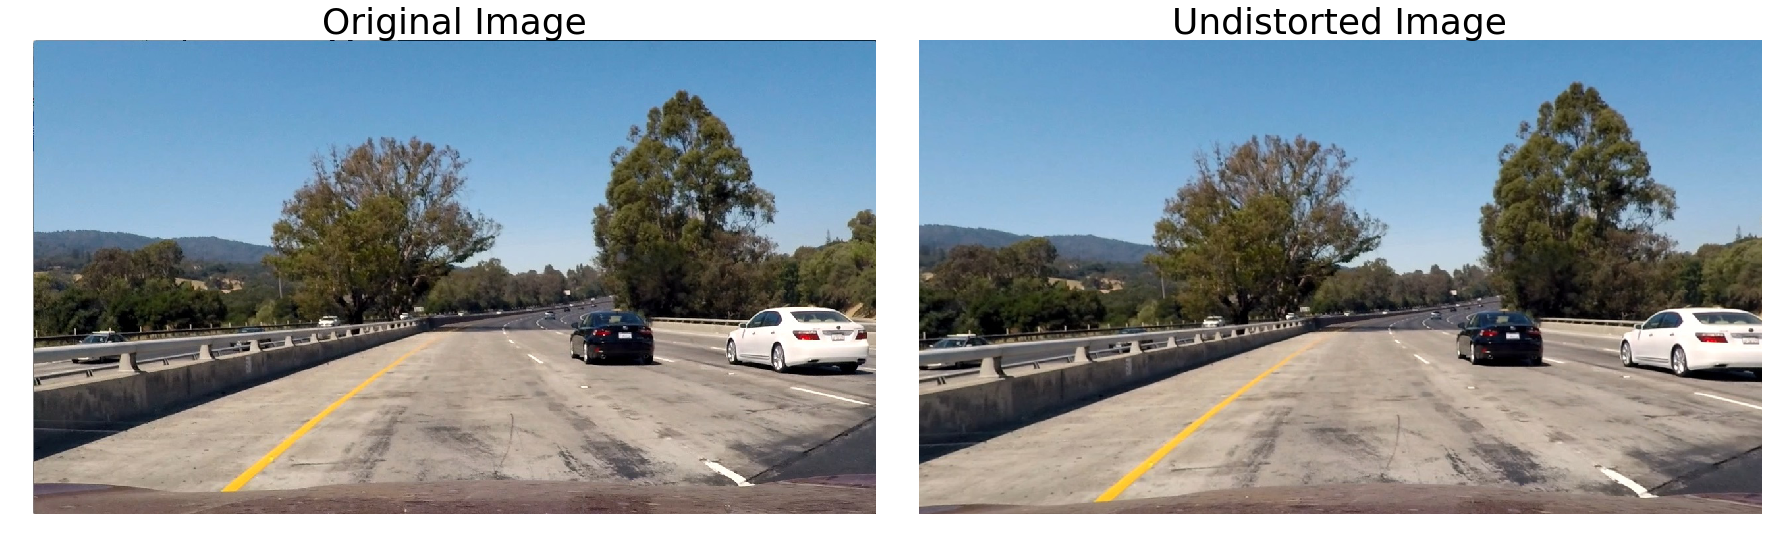

In [8]:
idx = 1
image_test_name = 'test{:1}.jpg'.format(idx)
image_test_path = './test_images/{0}'.format(image_test_name)
image_test = cv2.imread(image_test_path)
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
image_test_unditorted = cal_undistort(image_test, objpoints, imgpoints)

# plot (and save)
plot_original_undistort(
    image_test, 
    image_test_unditorted, 
    save=True, 
    save_path = './res/undistort_output_{0}'.format(image_test_name))

## Helper Functions
Below are some helper functions to help get you started. They should look familiar from the lesson!

In [9]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=8):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    slopes = [((y2-y1)/(x2-x1)) for line in lines for x1,y1,x2,y2 in line]
    lane_slopes_right = np.average(np.array([m for m in slopes if m > 0]))
    lane_slopes_left = np.average(np.array([m for m in slopes if m < 0]))
    
    # Left side
    lines_left = [line for line in lines for x1,y1,x2,y2 in line if ((y2-y1)/(x2-x1)) < 0]
    lines_right = [line for line in lines for x1,y1,x2,y2 in line if ((y2-y1)/(x2-x1)) > 0]
    
    l_a_dict = {y1:x1 for line in lines_left for x1, y1, x2, y2 in line}
    l_a_y = min(l_a_dict, key=l_a_dict.get)
    l_a = [l_a_dict[l_a_y], l_a_y]
    l_b_dict = {y2:x2 for line in lines_left for x1, y1, x2, y2 in line}
    l_b_y = max(l_b_dict, key=l_b_dict.get)
    l_b = [l_b_dict[l_b_y], l_b_y]
    
    # Right side
    r_a_dict = {y1:x1 for line in lines_right for x1, y1, x2, y2 in line}
    r_a_y = min(r_a_dict, key=r_a_dict.get)
    r_a = [r_a_dict[r_a_y], r_a_y]
    r_b_dict = {y2:x2 for line in lines_right for x1, y1, x2, y2 in line}
    r_b_y = max(r_b_dict, key=r_b_dict.get)
    r_b = [r_b_dict[r_b_y], r_b_y]
    
    ymin = min(l_b_y, r_a_y)
    ymax = max(l_a_y, r_b_y)
    
    l_x1, l_y1, l_x2, l_y2 = get_line(lane_slopes_left, l_b[0], l_b[1], ymin, ymax)
    cv2.line(img, (l_x1, l_y1), (l_x2, l_y2), color, thickness)
    
    r_x1, r_y1, r_x2, r_y2 = get_line(lane_slopes_right, r_a[0], r_a[1], ymin, ymax)
    cv2.line(img, (r_x1, r_y1), (r_x2, r_y2), color, thickness)
    
            
def get_line(slope, x0, y0, y_min, y_max):
    x1 = int(x0 + (y_max - y0) / slope)
    x2 = int(x0 + (y_min - y0) / slope)
    return x1, y_max, x2, y_min


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img


# Python 3 has support for cool math symbols.
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [10]:
import os
os.listdir("test_images/")

['straight_lines1.jpg',
 'straight_lines2.jpg',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg',
 'test7.jpg']

## Implementation
Here I implemented the codes to add pipeline and green zone to a road image. I splited up the implementation into multiple parts and put every part in a function to make code readable and reusable. Also there are multiple variables needs to be tuned that I put them in one place and you can find then in the next section.

In [11]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [28]:
# HLS color space
def copy_hls(image):
    img = np.copy(image)
    # Convert BGR to HLS
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    return hls


def get_white_yellow_mask1(img, s_thresh=(0, 255), r_thresh=(0, 255), prefix = None, _plot=False):
    # Convert BGR to HLS
    img_hls = copy_hls(img)
    
    # Yellow mask
    # define range of yellow color in HLS color space
    lower_range = np.array(y_lower, dtype=np.uint8)
    upper_range = np.array(y_upper, dtype=np.uint8)
    
    # Apply the range values to the HLS image to get only yellow colors
    mask_y_1 = cv2.inRange(img_hls, lower_range, upper_range)
    mask_y_1[mask_y_1==255] = 1
    mask_y_2 = hls_select(img, s_thresh=s_thresh)
    mask_y = cv2.bitwise_and(mask_y_1, mask_y_2)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(mask_y, cmap='gray')

    # White mask
    # define range of white color in HLS color space
    lower_range = np.array(w_lower, dtype=np.uint8)
    upper_range = np.array(w_upper, dtype=np.uint8)
    
    # Apply the range values to the HLS image to get only white colors
    mask_w_1 = cv2.inRange(img_hls, lower_range, upper_range)
    mask_w_1[mask_w_1==255] = 1
    mask_w_2 = rgb_select(img, r_thresh=r_thresh)
    mask_w = cv2.bitwise_and(mask_w_1, mask_w_2)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(mask_w, cmap='gray')
    
    # Mix the generated masks
    mask_wy = cv2.bitwise_or(mask_y, mask_w)
    idx = mask_wy != 0
    mask_wy[idx] = 255
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(mask_wy, cmap='gray')

    if (prefix is not None):
        cv2.imwrite('./res/{0}_mask_y.jpg'.format(prefix),mask_y)
        cv2.imwrite('./res/{0}_mask_w.jpg'.format(prefix),mask_w)
        cv2.imwrite('./res/{0}_mask_wy.jpg'.format(prefix),mask_wy)
        
    mask = np.zeros_like(img)
    mask[:,:,0] = mask_wy
    mask[:,:,1] = mask_wy
    mask[:,:,2] = mask_wy
    
    return np.copy(mask)


def get_white_yellow_mask(img, prefix = None, _plot=False):
    # Convert BGR to HLS
    img_hls = copy_hls(img)
    
    # Yellow mask
    # define range of yellow color in HLS color space
    lower_range = np.array(y_lower, dtype=np.uint8)
    upper_range = np.array(y_upper, dtype=np.uint8)
    
    # Apply the range values to the HLS image to get only yellow colors
    mask_y = cv2.inRange(img_hls, lower_range, upper_range)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(mask_y, cmap='gray')

    # White mask
    # define range of white color in HLS color space
    lower_range = np.array(w_lower, dtype=np.uint8)
    upper_range = np.array(w_upper, dtype=np.uint8)
    
    # Apply the range values to the HLS image to get only white colors
    mask_w = cv2.inRange(img_hls, lower_range, upper_range)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(mask_w, cmap='gray')
    
    # Mix the generated masks
    mask_wy = cv2.bitwise_or(mask_y, mask_w)
    idx = mask_wy != 0
    mask_wy[idx] = 255
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(mask_wy, cmap='gray')

    if (prefix is not None):
        cv2.imwrite('./res/{0}_mask_y.jpg'.format(prefix),mask_y)
        cv2.imwrite('./res/{0}_mask_w.jpg'.format(prefix),mask_w)
        cv2.imwrite('./res/{0}_mask_wy.jpg'.format(prefix),mask_wy)
        
    mask = np.zeros_like(img)
    mask[:,:,0] = mask_wy
    mask[:,:,1] = mask_wy
    mask[:,:,2] = mask_wy
    
    return np.copy(mask)


def hls_select(img, s_thresh=(0, 255), _plot=False):
    """
    A function that thresholds the S-channel of HLS
    """
    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # Apply a threshold to the S channel
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel )
    binary_output[(s_channel > s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    if(_plot):
        # Plot the result
        fig = get_new_figure()
        plt.imshow(binary_output, cmap='gray')
    
    # Return a binary image of threshold result
    return binary_output
    

def rgb_select(img, r_thresh=(0, 255), _plot=False):
    """
    A function that thresholds the S-channel of HLS
    """
    # Note: img is the undistorted image
    # Apply a threshold to the R channel
    r_channel = img[:,:,0]
    binary_output = np.zeros_like(r_channel )
    binary_output[(r_channel > r_thresh[0]) & (r_channel <= r_thresh[1])] = 1
    
    if(_plot):
        # Plot the result
        fig = get_new_figure()
        plt.imshow(binary_output, cmap='gray')
    
    # Return a binary image of threshold result
    return binary_output


def get_canny(img, mask = None, prefix = None, _plot=False):
    region_of_interest = img if mask is None else cv2.bitwise_and(img, mask)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(region_of_interest)
    
    region_of_interest_blur = gaussian_blur(region_of_interest, kernel_size)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(region_of_interest_blur)
    
    region_of_interest_canny = canny(region_of_interest_blur, canny_low_threshold, canny_high_threshold)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(region_of_interest_canny, cmap='gray')

    if (prefix is not None):
        cv2.imwrite('./res/{0}_region_of_interest.jpg'.format(prefix), cv2.cvtColor(region_of_interest, cv2.COLOR_RGB2BGR))
        cv2.imwrite('./res/{0}_region_of_interest_blur.jpg'.format(prefix), cv2.cvtColor(region_of_interest_blur, cv2.COLOR_RGB2BGR))
        cv2.imwrite('./res/{0}_region_of_interest_canny.jpg'.format(prefix), region_of_interest_canny)
        
    return np.copy(region_of_interest_canny)


def get_pt_src_dst(rows, cols):
    pt_src = np.float32([
        [cols * (1 - coef_w_top) / 2, rows * offset_v_top], \
        [cols * (1 + coef_w_top*1.2) / 2, rows * offset_v_top], \
        [cols * (1 - coef_w_dwn) / 2, rows * (1 - offset_v_dwn)], \
        [cols * (1 + coef_w_dwn) / 2, rows * (1 - offset_v_dwn)]])
    
    pt_dst = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
    
    return pt_src, pt_dst


def perspective_transform(img, pt_src, pt_dst, rows, cols):
    M = cv2.getPerspectiveTransform(pt_src, pt_dst)
    img_trans = cv2.warpPerspective(img, M, (cols, rows))
    return np.copy(img_trans)
    

def transform_to_rectangle(img, rows, cols, prefix = None, _plot=False):
    pt_src, pt_dst = get_pt_src_dst(rows, cols)
    img_trans = perspective_transform(img, pt_src, pt_dst, rows, cols)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(img_trans)
    
    if (prefix is not None):
        cv2.imwrite('./res/{0}_img_trans_org2rec.jpg'.format(prefix),img_trans)
       
    return np.copy(img_trans)


def transform_back_to_origin(img, rows, cols, prefix = None, _plot=False):
    pt_dst, pt_src = get_pt_src_dst(rows, cols)
    img_trans = perspective_transform(img, pt_src, pt_dst, rows, cols)
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(img_trans)
    
    if (prefix is not None):
        cv2.imwrite('./res/{0}_img_trans_rec2org.jpg'.format(prefix), cv2.cvtColor(img_trans, cv2.COLOR_RGB2BGR))
        
    return np.copy(img_trans)


def separate_to_left_right(img, prefix = None, _plot=False):
    # Create separate copies for the left and right lines
    img_left = np.copy(img)
    img_left[:, img_left.shape[1]//2:] = 0
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(img_left, cmap='gray')
    
    img_right = np.copy(img)
    img_right[:, 0:img_right.shape[1]//2] = 0
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(img_right, cmap='gray')
    
    if (prefix is not None):
        cv2.imwrite('./res/{0}_img_left.jpg'.format(prefix), img_left)
        cv2.imwrite('./res/{0}_img_right.jpg'.format(prefix), img_right)
        
    return np.copy(img_left), np.copy(img_right)


def find_hough_lines(img_left, img_right, prefix = None):
    # Define the Hough transform parameters
    lines_left = cv2.HoughLinesP(img_left, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    lines_right = cv2.HoughLinesP(img_right, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
        
    if (prefix is not None):
        add_hough_lines_point(img_left, lines_left, './res/{0}_img_left_plus_hough_lines.jpg'.format(prefix))
        add_hough_lines_point(img_right, lines_right, './res/{0}_img_right_plus_hough_lines.jpg'.format(prefix))
        
    return lines_left, lines_right


def add_hough_lines_point(img, lines, path):
    image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    
    lines_points_x = np.concatenate((lines[:,0][:,0],lines[:,0][:,2]))
    lines_points_y = np.concatenate((lines[:,0][:,1],lines[:,0][:,3]))
    lines_points_dict = {lines_points_x[i]:lines_points_y[i] for i in range(lines_points_x.shape[0])}

    lines_sorted = sorted(lines_points_dict.items(), key=lambda x: x[1])
    
    for p in lines_sorted:
        cv2.circle(image,(p[0], p[1]), 3, (255,0,0), 5)
        
    cv2.imwrite(path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


def find_pipeline(rows, cols, lines_left, lines_right, x_history, x_plot, _plot=False):
    y_plot_left, y_plot_right = None, None
        
    try:
        # Polynomial_interpolation: Left
        # prepare x and y
        lines_left_points_x = np.concatenate((lines_left[:,0][:,0],lines_left[:,0][:,2]))
        lines_left_points_y = np.concatenate((lines_left[:,0][:,1],lines_left[:,0][:,3]))
        lines_left_points_dict = {lines_left_points_x[i]:lines_left_points_y[i] for i in range(lines_left_points_x.shape[0])}

        lines_left_sorted = sorted(lines_left_points_dict.items(), key=lambda x: x[1])
        lines_left_points = np.array([[p[0], p[1]] for p in lines_left_sorted])

        # create matrix versions of these arrays
        X_history = x_history[:, np.newaxis]   
        # create matrix versions of these arrays
        X_plot = x_plot[:, np.newaxis]

        # Preparation
        x_left = lines_left_points[:,1] 
        # create matrix versions of these arrays
        X_left = x_left[:, np.newaxis] 
        if(bmodel['ls'] is None):
            y_left = lines_left_points[:,0]
        else:
            pred = bmodel['ls'].predict(X_left)
            yl0 = lines_left_points[:,0]
            deviation = np.divide(yl0 - pred, cols)

            th = 0.004
            idx = deviation > th
            deviation[idx] = th
            idx = deviation < -th
            deviation[idx] = -th

            y_left = pred + deviation * cols

            # Update variables
            x_left = np.concatenate((x_left, x_history))  
            # create matrix versions of these arrays
            X_left = x_left[:, np.newaxis]
            y_left = np.concatenate((y_left, bmodel['ls'].predict(X_history)))

        if(_plot):
            fig = get_new_figure()
            plt.gca().invert_yaxis()
            plt.scatter(y_left, x_left, color='navy', s=30, marker='o', label="training points")

        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(X_left, y_left)

        bmodel['ls'] = model

        y_plot_left = np.int16(model.predict(X_plot))

        if(_plot):
            plt.plot(y_plot_left, x_plot, color='teal', linewidth=lw,
                     label="degree %d" % degree)
            plt.legend(loc='upper right')

        # Polynomial_interpolation: Right
        # prepare x and y
        lines_right_points_x = np.concatenate((lines_right[:,0][:,0],lines_right[:,0][:,2]))
        lines_right_points_y = np.concatenate((lines_right[:,0][:,1],lines_right[:,0][:,3]))
        lines_right_points_dict = {lines_right_points_x[i]:lines_right_points_y[i] for i in range(lines_right_points_x.shape[0])}
        lines_right_sorted = sorted(lines_right_points_dict.items(), key=lambda x: x[1])
        lines_right_points = np.array([[p[0], p[1]] for p in lines_right_sorted])

        # Preparation
        x_right = lines_right_points[:,1]  
        # create matrix versions of these arrays
        X_right = x_right[:, np.newaxis]

        if(bmodel['rs'] is None):
            y_right = lines_right_points[:,0]
        else:
            pred = bmodel['rs'].predict(X_right)
            yr0 = lines_right_points[:,0]
            deviation = np.divide(yr0 - pred, cols)
            th = 0.004
            idx = deviation > th
            deviation[idx] = th
            idx = deviation < -th
            deviation[idx] = -th

            y_right = pred + deviation * cols

            # Update
            x_right = np.concatenate((x_right, x_history)) 
            # create matrix versions of these arrays
            X_right = x_right[:, np.newaxis]
            y_right = np.concatenate((y_right, bmodel['rs'].predict(X_history)))

        if(_plot):
            plt.scatter(y_right, x_right, color='navy', s=30, marker='o', label="training points")

        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(X_right, y_right)

        bmodel['rs'] = model

        y_plot_right = np.int16(model.predict(X_plot))

        if(_plot):
            plt.plot(y_plot_right, x_plot, color='teal', linewidth=lw,
                     label="degree %d" % degree)
    except (TypeError):
        err = 1
        # ignored

    if (y_plot_left is not None):
        bmodel['lyp'] = y_plot_left
        
    if (y_plot_right is not None):
        bmodel['ryp'] = y_plot_right
    
    return bmodel['lyp'], bmodel['ryp']



def draw_pred_lines(rows, cols, y_plot_left, y_plot_right, x_plot, line_width, prefix = None, _plot=False):
    # Draw lines
    img_lines = np.zeros((rows, cols, 3), dtype=np.uint8)
    
    # Left side
    for i in range(len(x_plot) - 1):
        cv2.line(img_lines, (y_plot_left[i+0], x_plot[i+0]), (y_plot_left[i+1], x_plot[i+1]), (255,0,0), line_width)
    
    # Right side
    for i in range(len(x_plot) - 1):
        cv2.line(img_lines, (y_plot_right[i+0], x_plot[i+0]), (y_plot_right[i+1], x_plot[i+1]), (255,0,0), line_width)
    
    build_new_mask_rec(img_lines, y_plot_left, y_plot_right, x_plot)

    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(img_lines)
    
    
    if (prefix is not None):
        cv2.imwrite('./res/{0}_calculated_curved_pipelines.jpg'.format(prefix), cv2.cvtColor(img_lines, cv2.COLOR_RGB2BGR))
    return np.copy(img_lines)


def add_green_zone(img, y_plot_left, y_plot_right, x_plot, prefix = None, _plot = False):
    area1 = [[y_plot_left[i], x_plot[i]] for i in range(len(x_plot))]
    area2 = [[y_plot_right[len(x_plot) - 1 - i], x_plot[len(x_plot) - 1 - i]] for i in range(len(x_plot))]
    area = np.array(np.concatenate((area1, area2), axis=0), np.int32)

    cv2.fillPoly(img, [area], (0, 255, 0))
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(img)
        
    if (prefix is not None):
        cv2.imwrite('./res/{0}_curved_pipelines_with_green_zone.jpg'.format(prefix), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        
    return np.copy(img)


def radius_of_curvature(_l, _r, x_plot):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30./720. # meters per pixel in y dimension
    xm_per_pix = 3.7/700. # meters per pixel in x dimension
    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(x_plot*ym_per_pix, _l*xm_per_pix, 2)
    left_roc = roc(x_plot[-2], left_fit[0], left_fit[1])
    right_fit = np.polyfit(x_plot*ym_per_pix, _r*xm_per_pix, 2)
    right_roc = roc(x_plot[-2]*ym_per_pix, right_fit[0], right_fit[1])
    
    _slope_of_normal = -1.0/(2*right_fit[0]*x_plot[-2]*ym_per_pix + right_fit[1])
    _sign = -1.0 if right_fit[0]>0 else 1.0
    _y_center = _sign*left_roc*(1+_slope_of_normal**2)**(-0.5)+x_plot[-2]*ym_per_pix
    
    _vehicle_pos = 'left' if _y_center < x_plot[-2]*ym_per_pix else 'right'
    
    return left_roc, right_roc, _y_center, _vehicle_pos
    
    
def roc(y, a, b):
    return ((1 + (2*a*y+b)**2)**(1.5))/(2* abs(a))


def build_new_mask_rec(img, _l, _r, x_plot, _margin = 175):
    _ll = _l - _margin
    _lr = _l + _margin
    _lpoints1 = [(y, x) for y, x in zip(_ll, x_plot)]
    _lpoints2 = [(y, x) for y, x in zip(_lr, x_plot)]
    _lpoints = np.array([np.concatenate((_lpoints1, _lpoints2[-1::-1]),axis = 0)], dtype=np.int32)
    _rl = _r - _margin
    _rr = _r + _margin
    _rpoints1 = [(y, x) for y, x in zip(_rl, x_plot)]
    _rpoints2 = [(y, x) for y, x in zip(_rr, x_plot)]
    _rpoints = np.array([np.concatenate((_rpoints1, _rpoints2[-1::-1]),axis = 0)], dtype=np.int32)
    
    rows, cols, ch=img.shape
    new_mask = np.zeros_like(img)
    color = np.uint8([255,255,255])
    c = tuple(map(int, color))
    cv2.fillPoly(new_mask, _lpoints, color=c)
    cv2.fillPoly(new_mask, _rpoints, color=c)
    new_mask = transform_back_to_origin(new_mask, rows, cols)
    
    
def put_text(img, left_roc, right_roc, _y_center, _vehicle_pos):
    font = cv2.FONT_HERSHEY_DUPLEX
    _roc = '>> Radius of Curvature is {0:8.2f}m'.format(left_roc)
    cv2.putText(img,_roc,(10,50), font, 1,(255,255,255),1,cv2.LINE_AA)
    _pos = '>> Vehicle is {0:8.2f}m {1:5s} of center'.format(abs(_y_center), _vehicle_pos)
    cv2.putText(img,_pos,(10,90), font, 1,(255,255,255),1,cv2.LINE_AA)
    return img


def get_new_figure():
    return plt.figure(figsize=(12, 6.75), dpi= 100, facecolor='w', edgecolor='k')

`find_pipelines_and_green_zone(img)` is the main function that is responsible for adding pipelines and green zone to the image.

In [13]:
def find_pipelines_and_green_zone(img, objpoints, imgpoints, prefix = None, _plot = False):
    # Create an undistorted image
    img = cal_undistort(img, objpoints, imgpoints)
    rows,cols,ch = img.shape
    
    if(_plot):
        fig = get_new_figure()
        plt.imshow(img)
    
    # Create a mask for yellow and green colors
    mask = get_white_yellow_mask(img, prefix=prefix,_plot =_plot)
    
    # If there is any mask in buffer from previous frame apply it to the main mask
    if new_mask is not None:
        mask = cv2.bitwise_and(mask, new_mask)
        
    # Find the canny-edge-detected image
    canny = get_canny(img, mask=mask, prefix=prefix, _plot = _plot)
    
    # Transform the region of interest to a rectangle
    img_trans = transform_to_rectangle(canny, rows, cols, prefix=prefix, _plot = _plot)
    
    # Split image in two for the left and right pipelins
    img_left, img_right = separate_to_left_right(img_trans, prefix=prefix, _plot = _plot)
    
    # Find the left and right pipelines
    lines_left, lines_right = find_hough_lines(img_left, img_right, prefix=prefix)

    # Fit a degree 2 polynomial to the left and right pipelines
    len_x_history = 40
    len_x_plot = 10
    x_history = np.int16(np.linspace(0, rows - 1, len_x_history))
    x_plot = np.int16(np.linspace(0, rows - 1, len_x_plot)) 
    y_plot_left, y_plot_right = find_pipeline(rows, cols, lines_left, lines_right, x_history, x_plot, _plot = _plot)

    # continue if you are able to fit a line or use previous frames fitted line
    left_roc, right_roc = 0.0, 0.0
    if(y_plot_left is not None and y_plot_right is not None):
        # Calculate radius of curvature and distance
        left_roc, right_roc, _y_center, _vehicle_pos = radius_of_curvature(y_plot_left, y_plot_right, x_plot)
        
        # Draw lines
        line_width = 40
        img_lines = draw_pred_lines(rows, cols, y_plot_left, y_plot_right, x_plot, line_width, prefix=prefix, _plot = _plot)
        img_green_zone = add_green_zone(img_lines, y_plot_left, y_plot_right, x_plot, prefix=prefix, _plot = _plot)

        # Transform region of interest back to the original shape
        img_trans_back = transform_back_to_origin(img_green_zone, rows, cols, prefix=prefix, _plot = _plot)
        img_tback = np.copy(img_trans_back)
        
    # Add it to the original image
    img_wght = weighted_img(img, img_tback)
    
    # Put the radius of curvature in the frame
    final = put_text(img_wght, left_roc, right_roc, _y_center, _vehicle_pos)

    if(_plot):
        fig = get_new_figure()
        plt.imshow(final)

    if (prefix is not None):
        cv2.imwrite('./res/{0}_final.jpg'.format(prefix), cv2.cvtColor(final, cv2.COLOR_RGB2BGR))

    return final

`reset_buffer()` function is used to reset the buffer that is used for storing the pipeline prediction models. 

In [14]:
# reset buffer
def reset_buffer():
    global bmodel
    global new_mask
    global img_tback
    new_mask = None
    img_tback = np.uint8(np.zeros((720, 1024, 3)))
    bmodel = {'ls':None, 'rs':None, 'lyp':None, 'ryp':None}
    
reset_buffer()

In the following cell, I test my implementation for sample test images.

In [15]:
import operator

def get_test_image(idx = 0):
    src_path_0 = 'test_images/'
    list_img = os.listdir(src_path_0)
    img_path = src_path_0 + list_img[idx]
    print(img_path)
    img = mpimg.imread(img_path)
    prefix = list_img[idx].split('.')[0]
    cv2.imwrite('./res/{0}_source.jpg'.format(prefix), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    # rows,cols,ch = img.shape
    # print(rows,cols,ch)
    return img, prefix

## Build a Lane Finding Pipeline
Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [16]:
# Color in range:project_video 
y_lower = [10, 0, 120]
y_upper = [40, 255, 255]
w_lower = [16, 182, 0]
w_upper = [255, 255, 255]

# Transform:project_video
coef_w_top = 0.15
coef_w_dwn = 1.00
offset_v_top = 0.63
offset_v_dwn = 0.05

# # Color in range:challenge_video 
# y_lower = [10, 0, 120]
# y_upper = [40, 255, 255]
# w_lower = [100, 182, 0]
# w_upper = [255, 255, 255]
# # Transform:challenge_video
# coef_w_top = 0.14
# coef_w_dwn = 1.00
# offset_v_top = 0.65
# offset_v_dwn = 0.05

# Blur
kernel_size = 9

# Canny
canny_low_threshold = 0
canny_high_threshold = 255

# Make a blank the same size as our image to draw on
rho = 1                 # distance resolution in pixels of the Hough grid
theta = np.pi/180 * 0.5 # angular resolution in radians of the Hough grid
threshold = 10          # minimum number of votes (intersections in Hough grid cell)
min_line_len = 15       # minimum number of pixels making up a line
max_line_gap = 10       # maximum gap in pixels between connectable line segments

# Interpolation
degree = 2

# plot 
lw = 2

In [17]:
plt.close('all')

test_images/test2.jpg


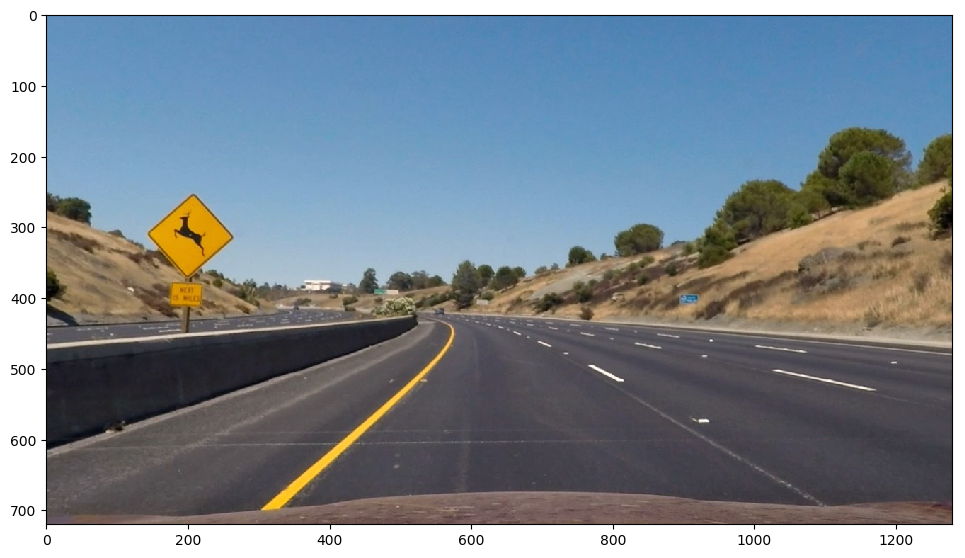

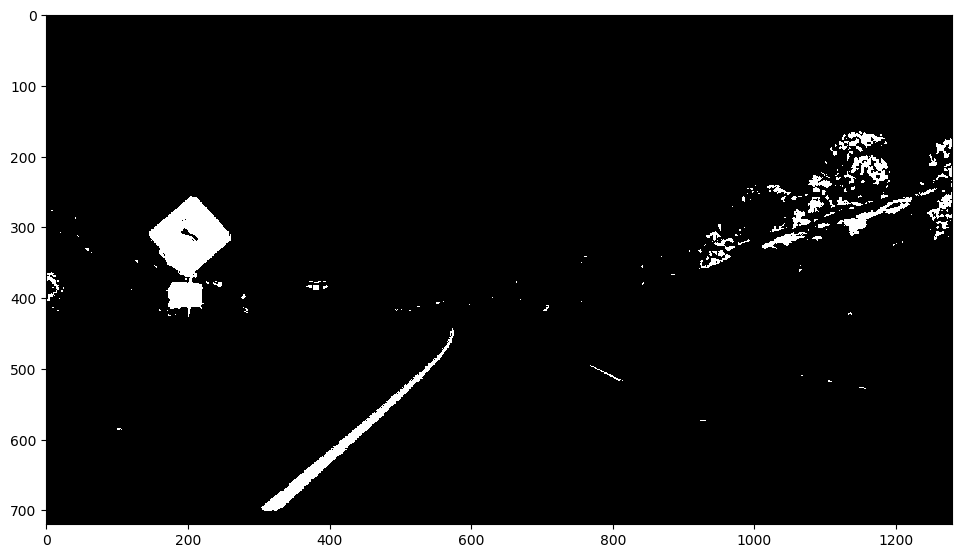

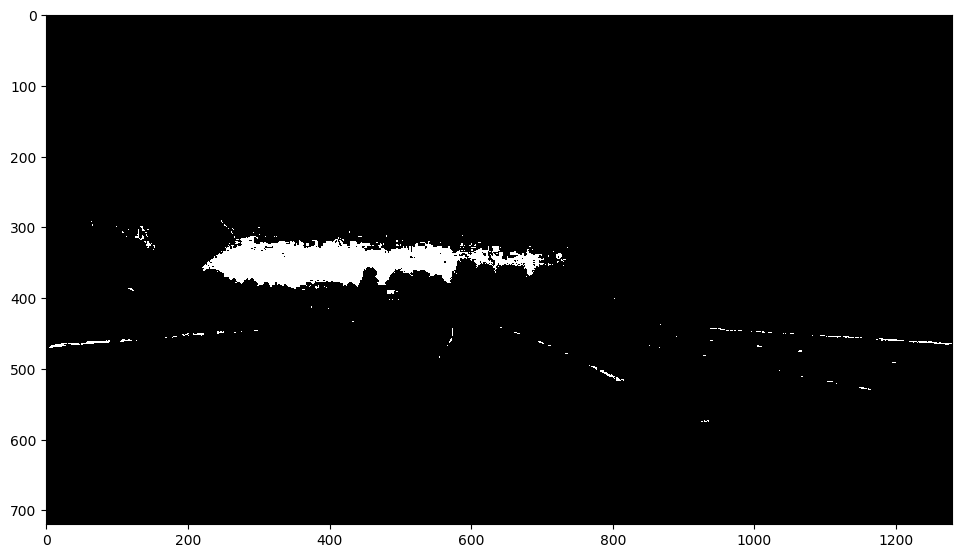

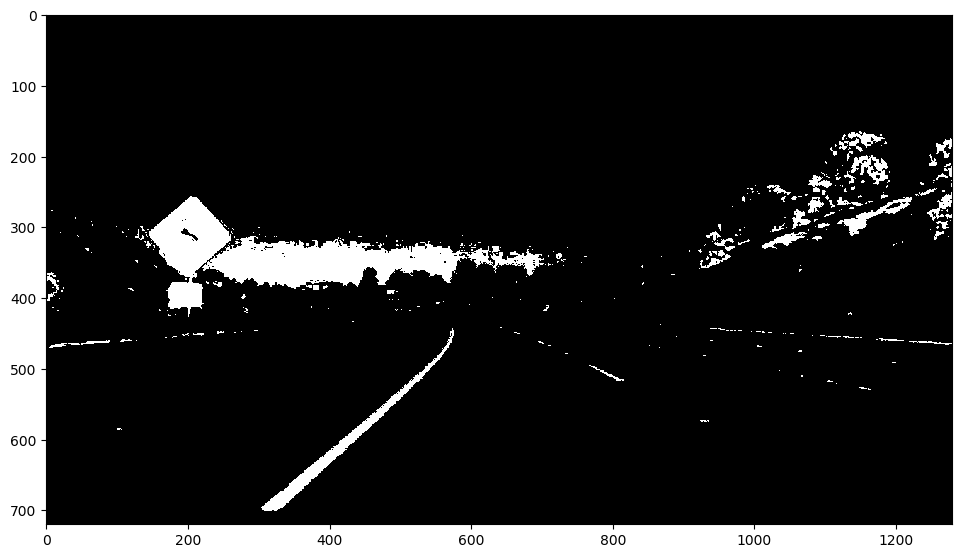

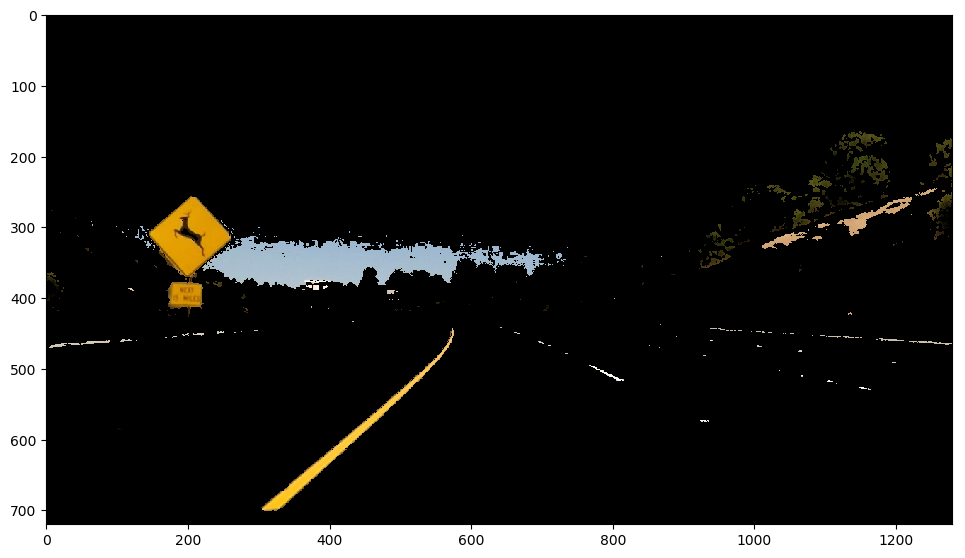

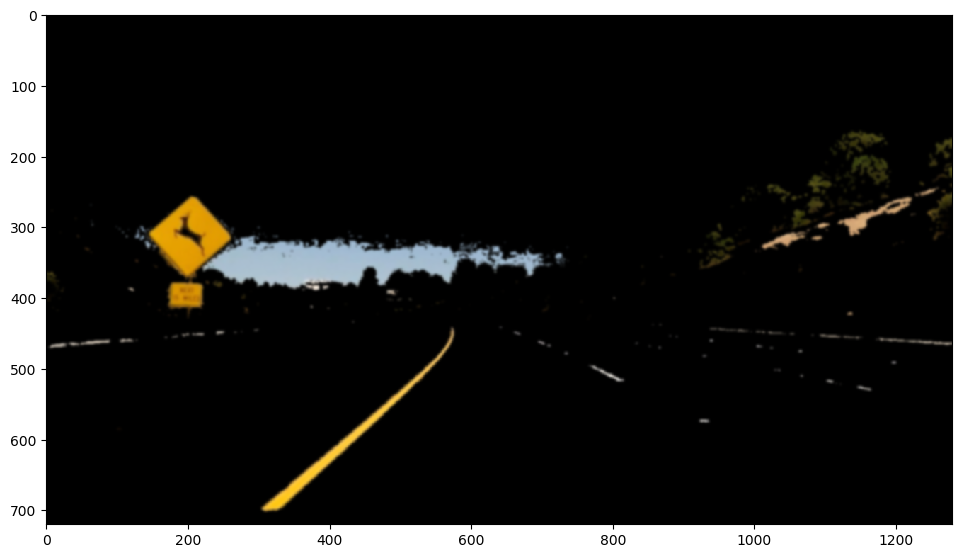

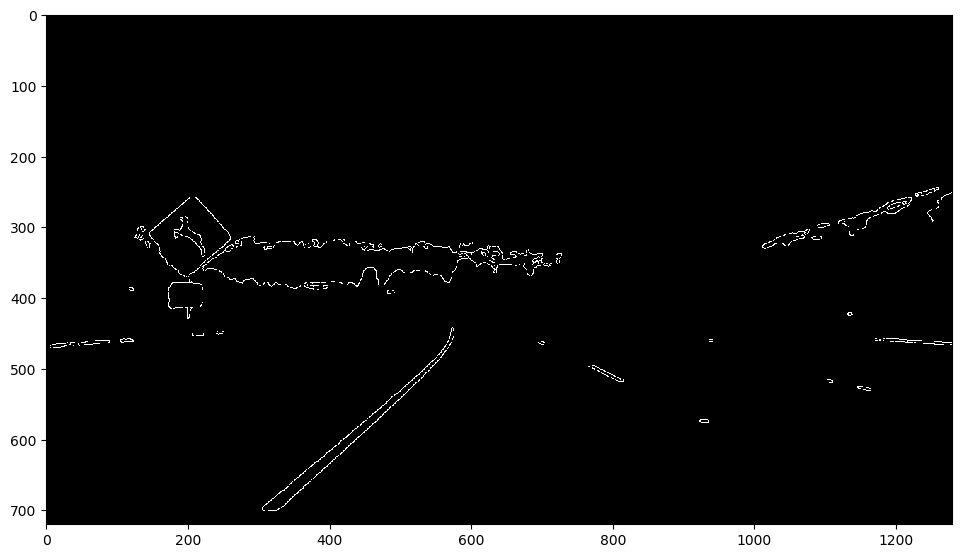

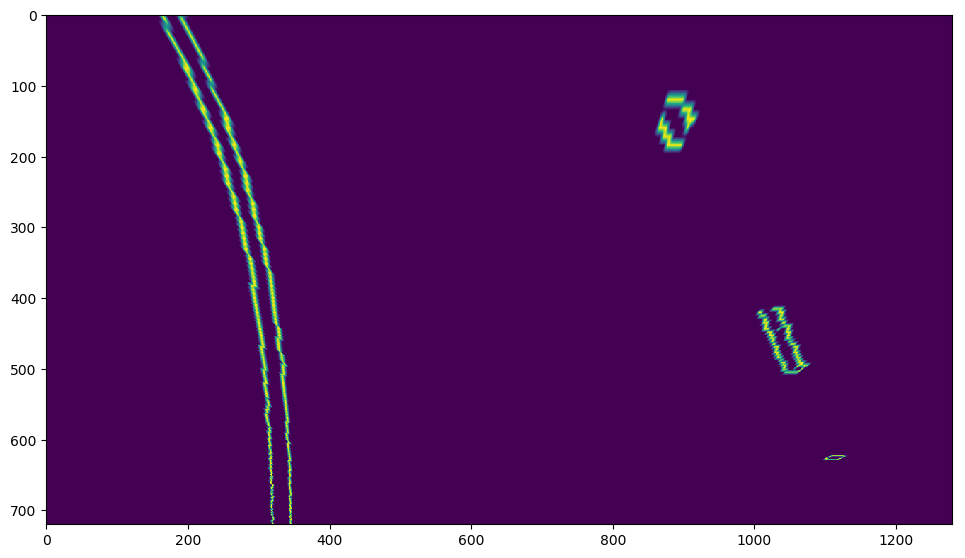

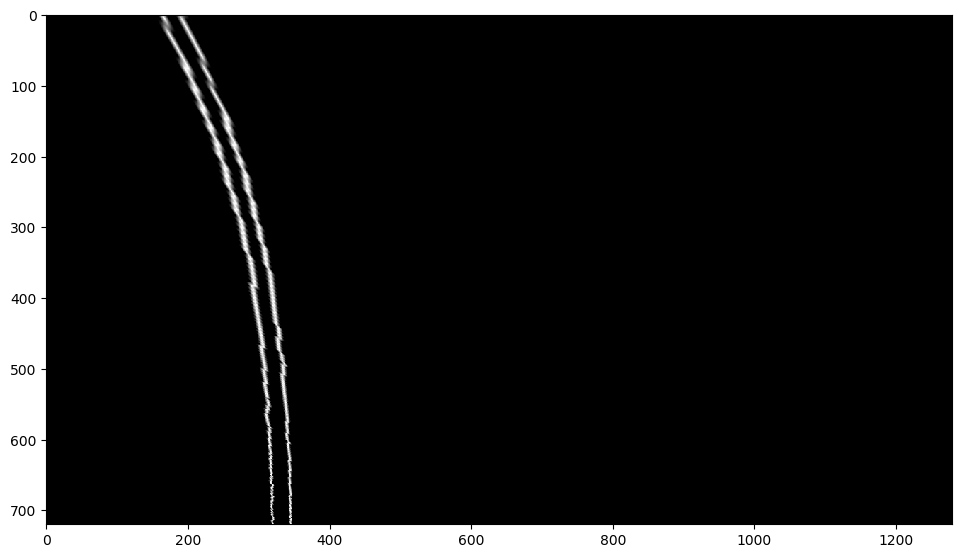

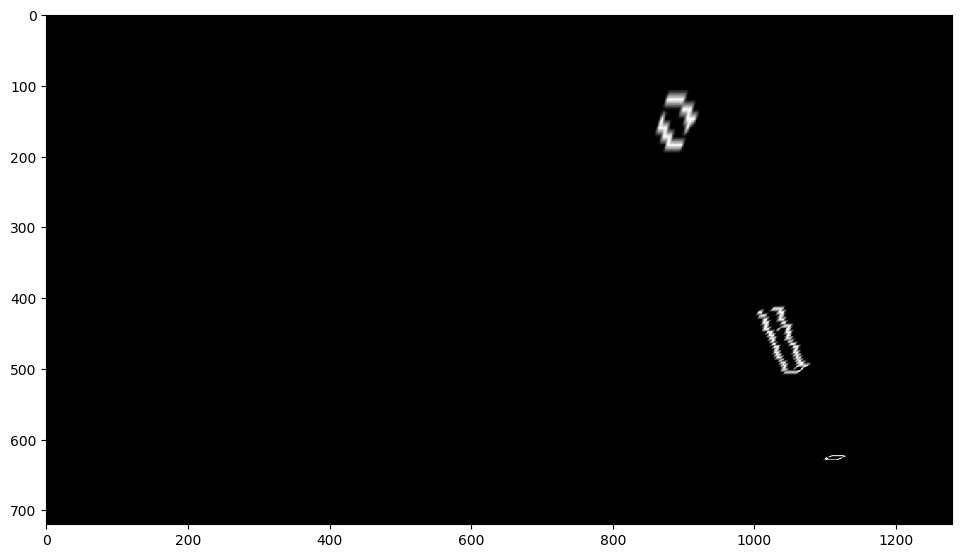

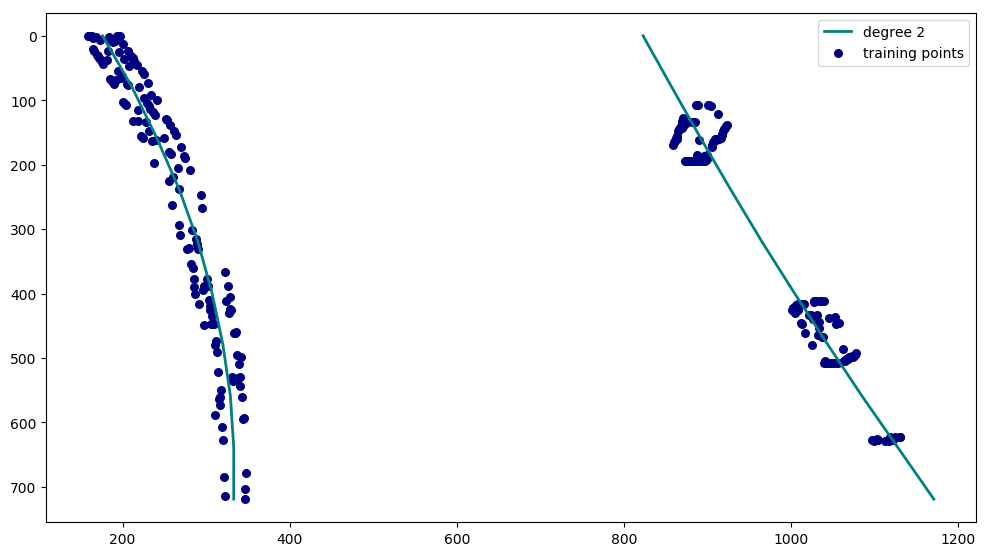

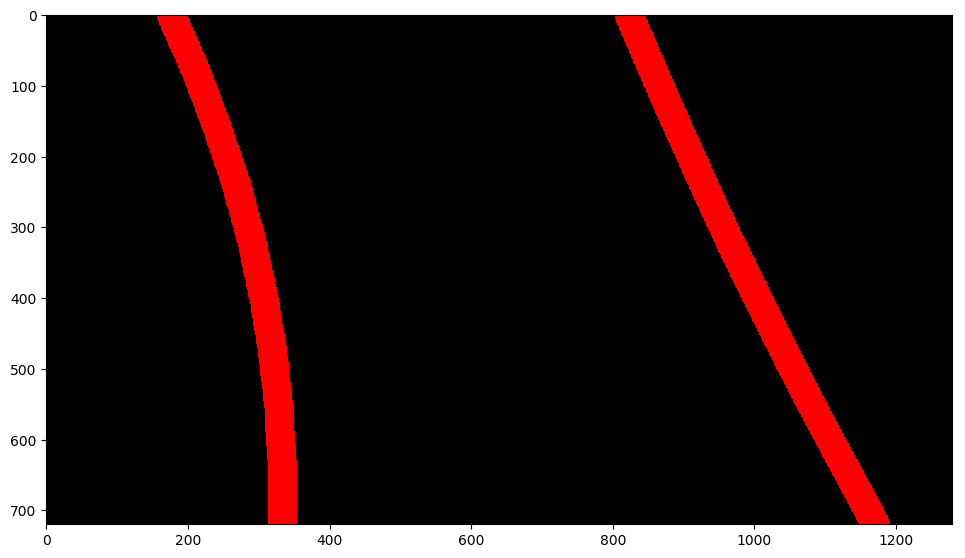

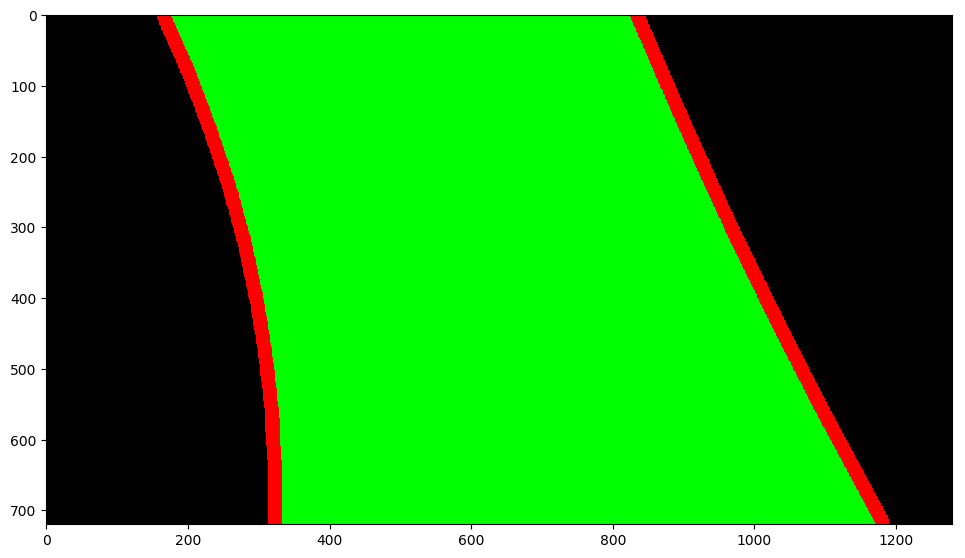

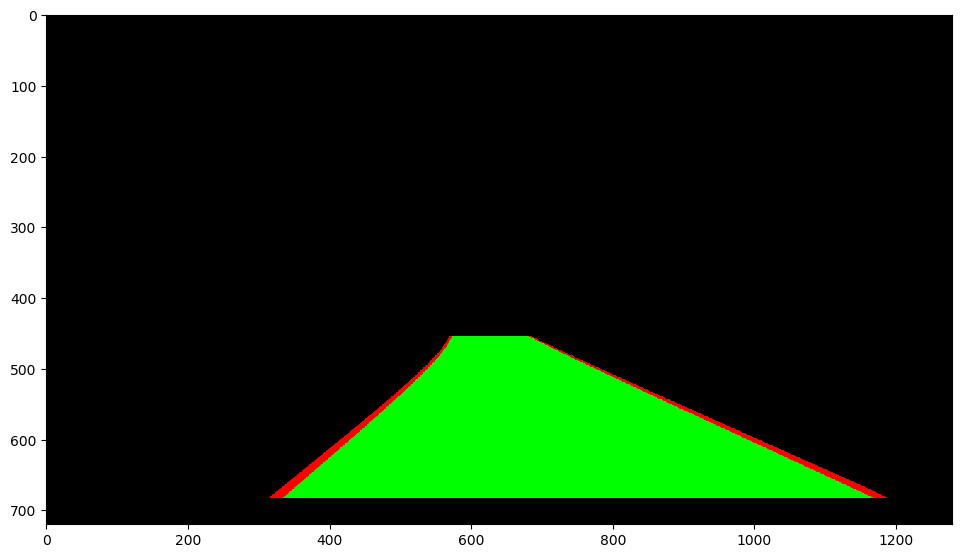

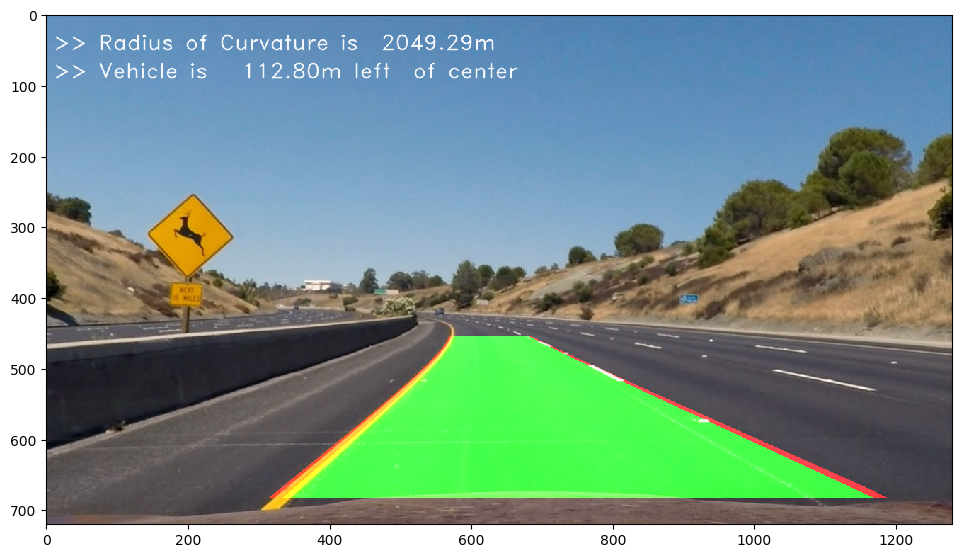

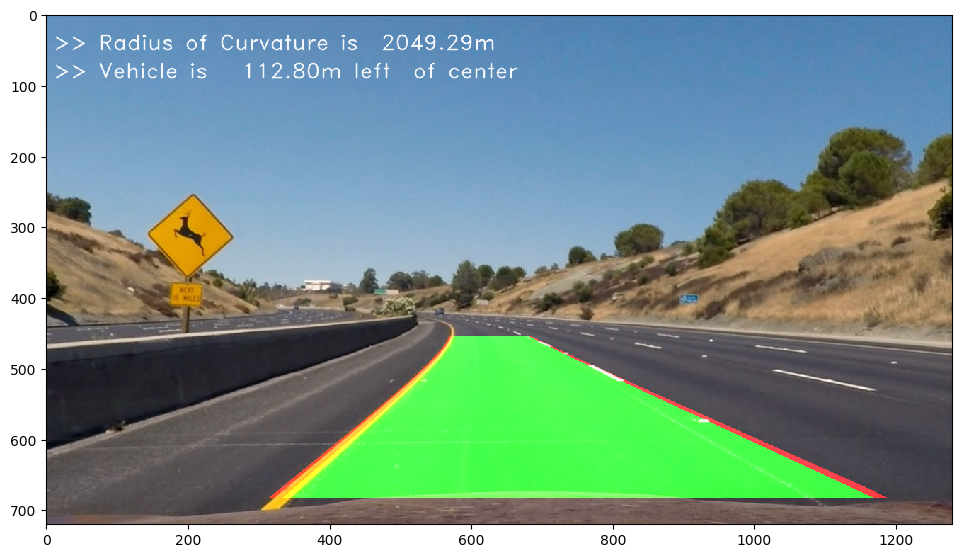

In [29]:
plt.close('all')
# for idx in range(7):
idx = 3
reset_buffer()
# print(bmodel)
image, prefix = get_test_image(idx)
# prefix = None
result = find_pipelines_and_green_zone(image,objpoints, imgpoints, prefix=prefix, _plot = True)
# print(bmodel)
fig = get_new_figure()
plt.imshow(result)
plt.draw()

In [19]:
# plt.close('all')
# # for idx in range(7):
# idx = 6
# reset_buffer()
# image, prefix = get_test_image(idx)
# result = find_pipelines_and_green_zone(image,objpoints, imgpoints, prefix)
# # fig = get_new_figure()
# # plt.imshow(result)
# # plt.draw()

In [20]:
# from collections import deque
# _len = 2
# buffer_model = deque([None]*_len)

# for i in range(_len*5):
#     print(buffer_model)
    
#     bmodel = buffer_model.popleft()
#     if(bmodel is None): 
#         bmodel = {'ls':None, 'rs':None}
#         y_left = 5+i
#     else:
#         y_left = 2 + bmodel['ls']


#     bmodel['ls'] = y_left
#     if(bmodel['rs'] is None):
#         y_right = 7+i
#     else:
#         y_right = 1 + bmodel['rs']


#     bmodel['rs'] = y_right
#     buffer_model.append(bmodel)

In [21]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [22]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    result = find_pipelines_and_green_zone(image,objpoints, imgpoints)
    
    return result

In [25]:
_output = 'output/project_video.mp4'
# white_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
reset_buffer()
# clip1 = VideoFileClip("test_videos/project_video.mp4").subclip(17,28)
clip1 = VideoFileClip("test_videos/project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(_output, audio=False)

[MoviePy] >>>> Building video output/project_video.mp4
[MoviePy] Writing video output/project_video.mp4


100%|█████████▉| 1260/1261 [10:09<00:00,  2.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output/project_video.mp4 

Wall time: 10min 10s


In [31]:
# _output = 'output/challenge_video.mp4'
# # white_output = 'test_videos_output/solidYellowLeft.mp4'
# ## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
# ## To do so add .subclip(start_second,end_second) to the end of the line below
# ## Where start_second and end_second are integer values representing the start and end of the subclip
# ## You may also uncomment the following line for a subclip of the first 5 seconds
# ##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
# reset_buffer()
# clip1 = VideoFileClip("test_videos/challenge_video.mp4")
# # clip1 = VideoFileClip("test_videos/challenge_video.mp4").subclip(0,2)
# # clip1 = VideoFileClip("test_videos/challenge_video.mp4")
# white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
# %time white_clip.write_videofile(_output, audio=False)

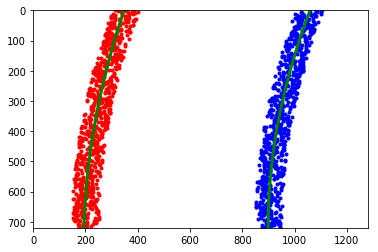

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images